In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Getting Functions Together

In [2]:
eachLetter = [chr(x+97) for x in range(26)]
eachLetter = dict.fromkeys(eachLetter)

In [3]:
print(eachLetter)

{'a': None, 'b': None, 'c': None, 'd': None, 'e': None, 'f': None, 'g': None, 'h': None, 'i': None, 'j': None, 'k': None, 'l': None, 'm': None, 'n': None, 'o': None, 'p': None, 'q': None, 'r': None, 's': None, 't': None, 'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}


In [4]:
from itertools import islice

someWords = []

with open('data/popular.txt') as f:
    for line in islice(f, 0, None, 100):
        someWords.append(line.strip())

In [5]:
len(someWords)

254

In [6]:
for letter in eachLetter:
    eachLetter[letter] = dict()

In [7]:
print(eachLetter)

{'a': {}, 'b': {}, 'c': {}, 'd': {}, 'e': {}, 'f': {}, 'g': {}, 'h': {}, 'i': {}, 'j': {}, 'k': {}, 'l': {}, 'm': {}, 'n': {}, 'o': {}, 'p': {}, 'q': {}, 'r': {}, 's': {}, 't': {}, 'u': {}, 'v': {}, 'w': {}, 'x': {}, 'y': {}, 'z': {}}


## Extract positions

In [8]:
import copy

In [9]:
word = someWords[100]
letterDists = copy.deepcopy(eachLetter)

In [10]:
for idx, letter in enumerate(word):
    print(idx, letter)

0 g
1 r
2 o
3 w
4 e
5 r
6 s


In [11]:
for idx, letter in enumerate(word):
    letterDists[letter][idx] = letterDists[letter].get(idx, 0) + 1

In [12]:
print(letterDists)

{'a': {}, 'b': {}, 'c': {}, 'd': {}, 'e': {4: 1}, 'f': {}, 'g': {0: 1}, 'h': {}, 'i': {}, 'j': {}, 'k': {}, 'l': {}, 'm': {}, 'n': {}, 'o': {2: 1}, 'p': {}, 'q': {}, 'r': {1: 1, 5: 1}, 's': {6: 1}, 't': {}, 'u': {}, 'v': {}, 'w': {3: 1}, 'x': {}, 'y': {}, 'z': {}}


### At Scale

In [13]:
letterDists = copy.deepcopy(eachLetter)

In [14]:
for word in someWords:
    for idx, letter in enumerate(word):
        letterDists[letter][idx] = letterDists[letter].get(idx, 0) + 1

LGTM

In [15]:
import pandas as pd

pd.DataFrame(letterDists).fillna(0)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,15.0,15.0,26.0,15.0,10.0,12.0,9.0,10.0,9.0,3.0,...,1.0,15.0,31.0,13.0,5.0,4.0,7.0,0.0,1.0,1.0
1,37.0,1.0,4.0,2.0,36.0,3.0,0.0,10.0,26.0,0.0,...,0.0,22.0,2.0,5.0,19.0,1.0,2.0,4.0,3.0,0.0
2,23.0,4.0,9.0,11.0,17.0,4.0,12.0,2.0,13.0,2.0,...,0.0,26.0,14.0,19.0,14.0,4.0,2.0,3.0,0.0,0.0
3,18.0,4.0,14.0,11.0,38.0,1.0,5.0,10.0,21.0,0.0,...,0.0,12.0,16.0,15.0,9.0,2.0,6.0,0.0,4.0,0.0
4,17.0,2.0,10.0,13.0,29.0,5.0,4.0,3.0,18.0,0.0,...,0.0,18.0,14.0,17.0,10.0,2.0,1.0,0.0,3.0,1.0
5,16.0,2.0,2.0,11.0,25.0,4.0,5.0,2.0,21.0,0.0,...,0.0,17.0,13.0,19.0,4.0,2.0,0.0,0.0,4.0,0.0
6,8.0,2.0,3.0,9.0,22.0,0.0,10.0,1.0,23.0,0.0,...,0.0,14.0,15.0,9.0,5.0,1.0,0.0,0.0,3.0,1.0
7,4.0,0.0,5.0,7.0,10.0,1.0,7.0,2.0,7.0,0.0,...,0.0,6.0,17.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0
8,4.0,0.0,2.0,1.0,10.0,0.0,6.0,1.0,9.0,0.0,...,0.0,2.0,4.0,5.0,3.0,0.0,0.0,0.0,3.0,0.0
9,1.0,1.0,2.0,3.0,6.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,7.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0


In [16]:
def get_letter_dists(corpus):
    eachLetter = [chr(x+97) for x in range(26)]
    eachLetter = dict.fromkeys(eachLetter)
    
    for letter in eachLetter:
        eachLetter[letter] = dict()
        
    for word in corpus:
        for idx, letter in enumerate(word):
            eachLetter[letter][idx] = eachLetter[letter].get(idx, 0) + 1
            
    return pd.DataFrame(eachLetter).fillna(0)

In [17]:
get_letter_dists(someWords)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,15.0,15.0,26.0,15.0,10.0,12.0,9.0,10.0,9.0,3.0,...,1.0,15.0,31.0,13.0,5.0,4.0,7.0,0.0,1.0,1.0
1,37.0,1.0,4.0,2.0,36.0,3.0,0.0,10.0,26.0,0.0,...,0.0,22.0,2.0,5.0,19.0,1.0,2.0,4.0,3.0,0.0
2,23.0,4.0,9.0,11.0,17.0,4.0,12.0,2.0,13.0,2.0,...,0.0,26.0,14.0,19.0,14.0,4.0,2.0,3.0,0.0,0.0
3,18.0,4.0,14.0,11.0,38.0,1.0,5.0,10.0,21.0,0.0,...,0.0,12.0,16.0,15.0,9.0,2.0,6.0,0.0,4.0,0.0
4,17.0,2.0,10.0,13.0,29.0,5.0,4.0,3.0,18.0,0.0,...,0.0,18.0,14.0,17.0,10.0,2.0,1.0,0.0,3.0,1.0
5,16.0,2.0,2.0,11.0,25.0,4.0,5.0,2.0,21.0,0.0,...,0.0,17.0,13.0,19.0,4.0,2.0,0.0,0.0,4.0,0.0
6,8.0,2.0,3.0,9.0,22.0,0.0,10.0,1.0,23.0,0.0,...,0.0,14.0,15.0,9.0,5.0,1.0,0.0,0.0,3.0,1.0
7,4.0,0.0,5.0,7.0,10.0,1.0,7.0,2.0,7.0,0.0,...,0.0,6.0,17.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0
8,4.0,0.0,2.0,1.0,10.0,0.0,6.0,1.0,9.0,0.0,...,0.0,2.0,4.0,5.0,3.0,0.0,0.0,0.0,3.0,0.0
9,1.0,1.0,2.0,3.0,6.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,7.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0


### At a lot of Scale

In [18]:
words = []

with open('data/popular.txt') as f:
    for line in f:
        words.append(line.strip())

In [19]:
df = get_letter_dists(words)

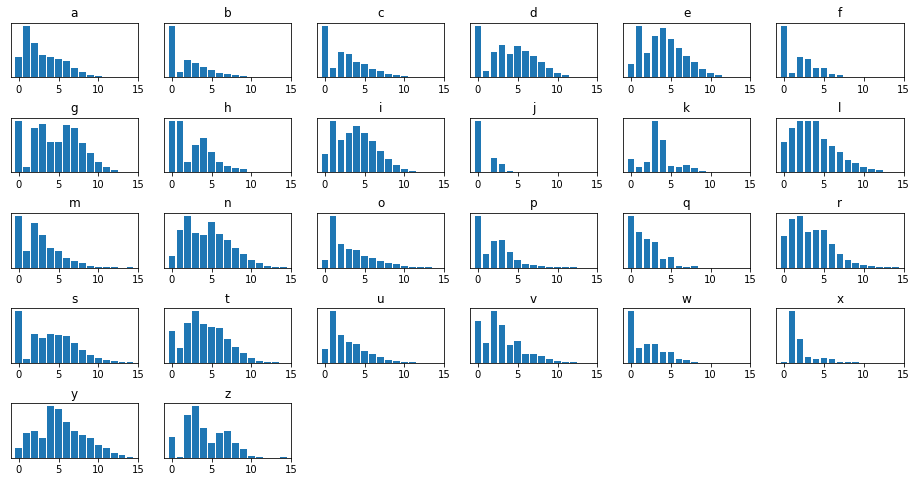

In [20]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))
for idx, (ax, col) in enumerate(zip(axes.flatten(), df)) :
    ax.bar(df.index, df[col])
    ax.set_title(col)
    ax.set_xlim(-1, 15)
    ax.get_yaxis().set_visible(False)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
plt.subplots_adjust(hspace=.75)

In [21]:
def plot_letter_dists(df):
    fig, axes = plt.subplots(5, 6, figsize=(16, 8))
    for idx, (ax, col) in enumerate(zip(axes.flatten(), df)) :
        ax.bar(df.index, df[col])
        ax.set_title(col)
        ax.set_xlim(-1, 15)
        ax.get_yaxis().set_visible(False)
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
    plt.subplots_adjust(hspace=.75)

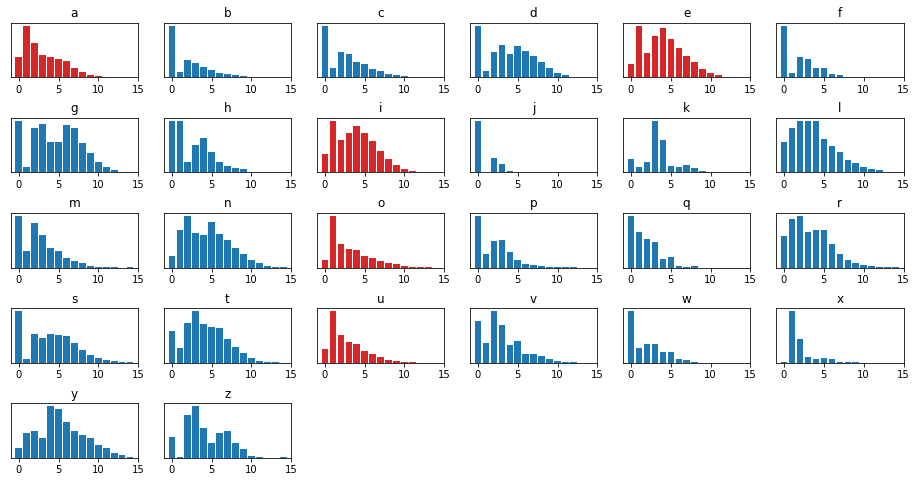

In [22]:
colors = where(df.columns.isin(['a', 'e', 'i', 'o', 'u']), 'C3', 'C0')

fig, axes = plt.subplots(5, 6, figsize=(16, 8))
for idx, (ax, col) in enumerate(zip(axes.flatten(), df)) :
    ax.bar(df.index, df[col], color=colors[idx])
    ax.set_title(col)
    ax.set_xlim(-1, 15)
    ax.get_yaxis().set_visible(False)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
plt.subplots_adjust(hspace=.75)

### As Heatmap

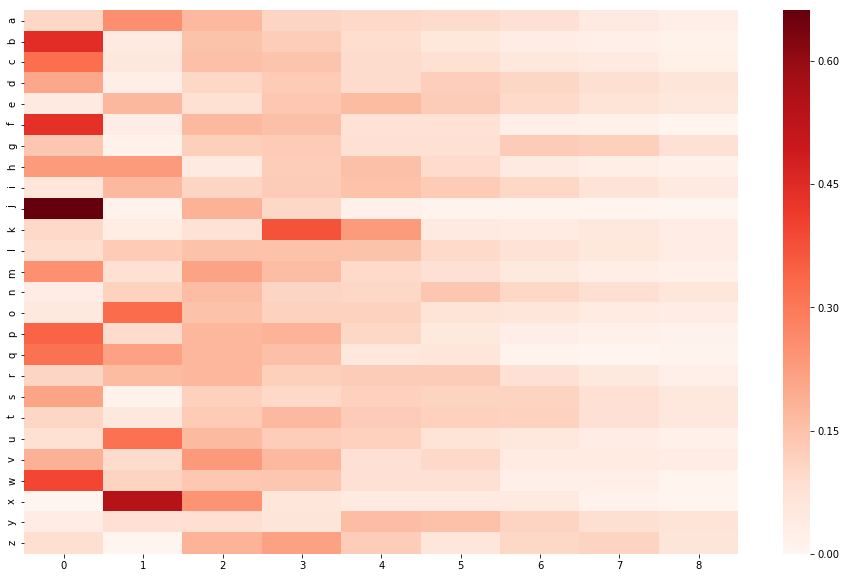

In [23]:
vals = (df / df.sum()).loc[:8].T.values

import seaborn as sns

sns.heatmap(vals, cmap='Reds')
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = plt.gca()
yax = ax.get_yaxis()
yax.set_ticks(np.arange(0.5, 26.5, 1))
_ = yax.set_ticklabels(eachLetter.keys())

In [24]:
df.to_csv('letterDists.csv', header=False)